In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


import plotly.express as px 
import plotly.graph_objects as go 


import yfinance as yf 

from datetime import date,timedelta
import datetime

In [6]:
today=date.today()
d1 = today.strftime("%Y-%m-%d")
end_date=d1 

In [18]:
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2 

In [19]:
data = yf.download('GOOG',start=start_date,end=end_date,progress=False)
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [22]:
data['date']=data.index 
data= data[['date','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
data.reset_index(drop=True,inplace=True)

In [23]:
data 

,date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-12,2596.669922,2615.399902,2592.000000,2611.280029,2611.280029,847200
1,2021-07-13,2617.629883,2640.840088,2612.739990,2619.889893,2619.889893,830900
2,2021-07-14,2638.030029,2659.919922,2637.959961,2641.649902,2641.649902,895600
3,2021-07-15,2650.000000,2651.899902,2611.959961,2625.330078,2625.330078,829300
4,2021-07-16,2632.820068,2643.659912,2616.429932,2636.909912,2636.909912,742800
...,...,...,...,...,...,...,...
246,2022-07-01,2166.739990,2196.126953,2142.100098,2181.620117,2181.620117,1550600
247,2022-07-05,2150.290039,2281.052002,2124.989990,2277.739990,2277.739990,1819900
248,2022-07-06,2281.840088,2327.040039,2245.010010,2304.270020,2304.270020,1442600
249,2022-07-07,2320.159912,2397.239990,2310.679932,2386.120117,2386.120117,1609200


In [25]:
df = data[['date','Close']]

In [26]:
df.head()

,date,Close
0,2021-07-12,2611.280029
1,2021-07-13,2619.889893
2,2021-07-14,2641.649902
3,2021-07-15,2625.330078
4,2021-07-16,2636.909912


Now let's visulize the close prices of google before moving forward: 

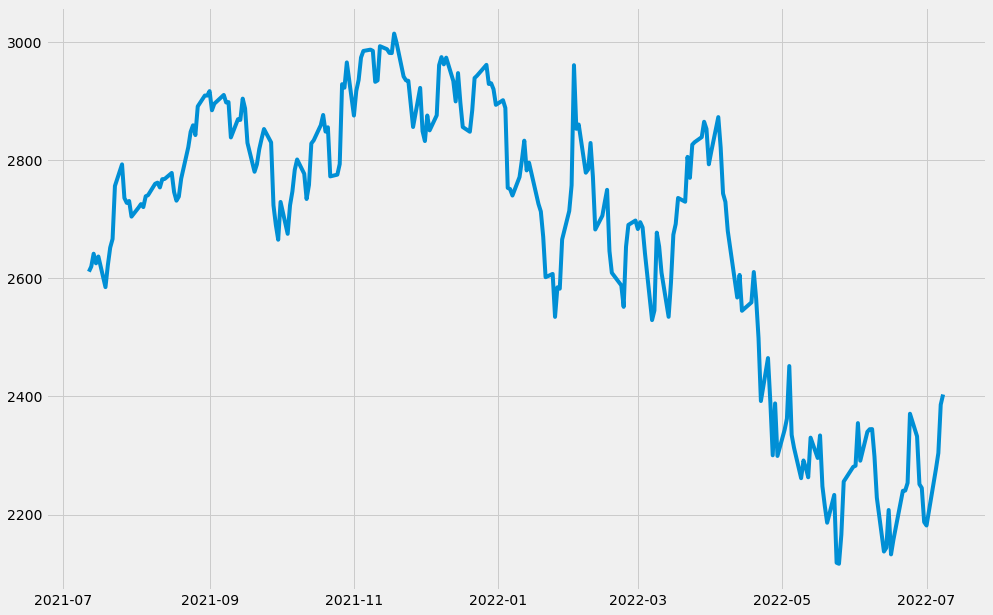

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(df['date'],data['Close'])

Using ARIMA for Time Series Forecasting
Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

<Figure size 432x288 with 0 Axes>

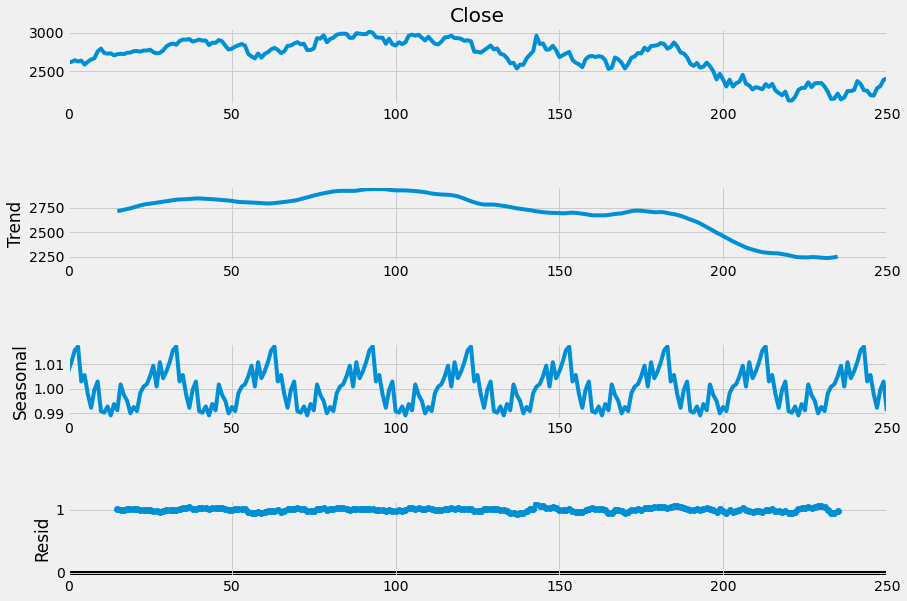

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(data['Close'],model='multiplicative',period=30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)


so our data is not stationary it is seasonal. We need to use the seasonal ARIMA(SARIMA)
model for Time Series Forecasting on this data. But before using the SARIMA we will use the 
ARIMA model. it will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

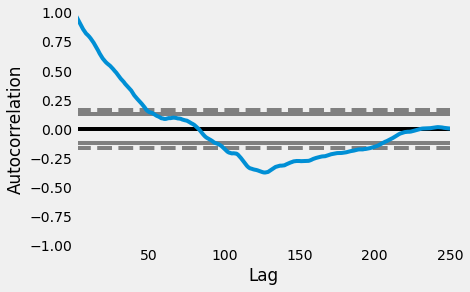

In [32]:
# Now here's how to find the value of p:
pd.plotting.autocorrelation_plot(data['Close'])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



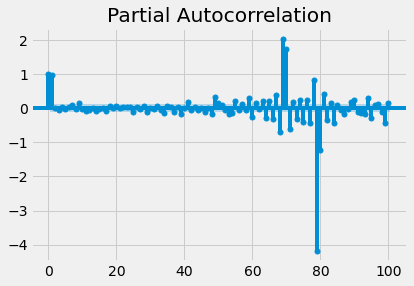

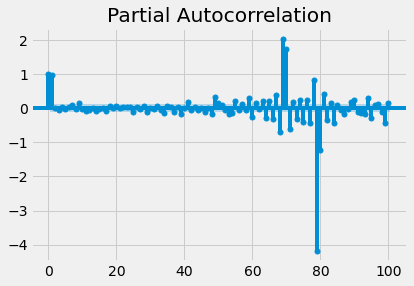

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(data['Close'],lags=100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

In [35]:
p,d,q = 5,1,2
from statsmodels.tsa.arima_model import ARIMA 
model = ARIMA(data['Close'],order=(p,d,q))
fitted = model.fit(disp=1)
print(fitted.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1330.474
Method:                       css-mle   S.D. of innovations             49.180
Date:                Mon, 11 Jul 2022   AIC                           2678.948
Time:                        21:31:24   BIC                           2710.641
Sample:                             1   HQIC                          2691.703
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8452      2.671     -0.316      0.752      -6.081       4.390
ar.L1.D.Close     1.7254      0.064     26.923      0.000       1.600       1.851
ar.L2.D.Close    -0.8912      0.126     

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [36]:
prediction= fitted.predict()
prediction

2      -1.175879
3      -1.552569
4      -0.770820
5      -3.049527
6       1.103212
         ...    
246    -1.469862
247    -0.067988
248     3.767099
249    10.341990
250     3.965945
Length: 249, dtype: float64

The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [37]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -1285.532
Date:                            Mon, 11 Jul 2022   AIC                           2601.063
Time:                                    21:38:13   BIC                           2653.147
Sample:                                         0   HQIC                          2622.054
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0694      0.138     -0.503      0.615      -0.340       0.201
ar.L2          0.9417      0.165   

In [38]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    2404.142371
252    2391.481607
253    2378.657076
254    2365.838252
255    2357.078059
256    2338.231224
257    2306.786542
258    2312.260226
259    2340.937918
260    2344.606661
261    2347.103478
Name: predicted_mean, dtype: float64


<AxesSubplot:>

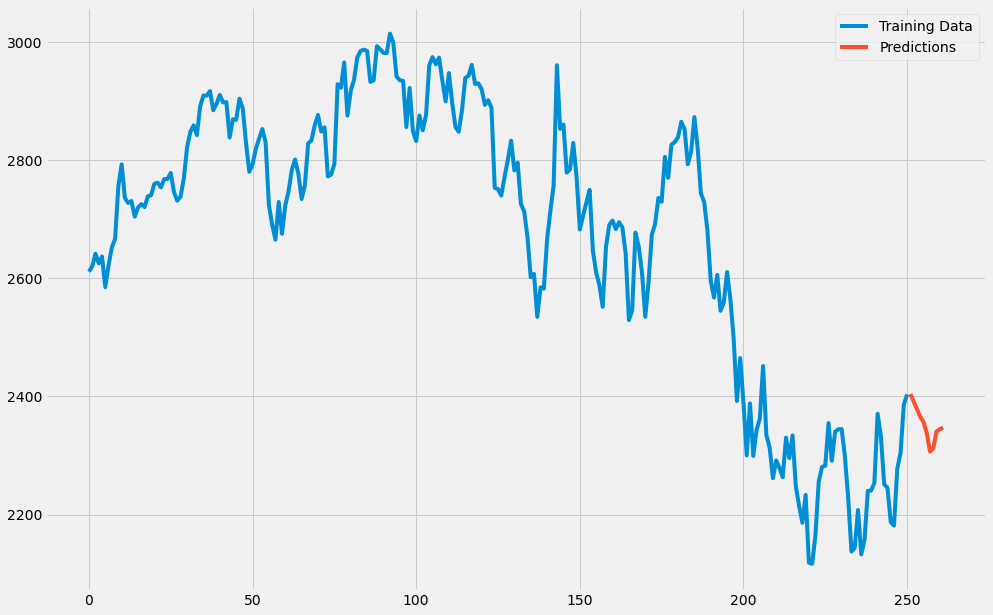

In [39]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

So this is how you can use ARIMA or SARIMA models for Time Series Forecasting using Python.

Summary
ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA). I hope you liked this article about Time Series Forecasting with ARIMA using Python. Feel free to ask valuable questions in the comments section below.